# NLM-MontgomeryCXRSet

Distribución del dataset:

- 58 casos de pacientes con manifestación de tuberculosis
- 80 casos normales 

Atributos 

- Género
- Edad
- Indica la anormalidad(Sano o Enfermo con Manifestación de Tuberculosis) 


In [38]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [39]:
#Función para graficar los datasets
def graficar_dataset(dataset, tamano_x = 8, tamano_y = 10, columnas = 3, filas = 3, ancho_max_txt=20):
    figure = plt.figure(figsize=(tamano_x, tamano_y))
    cols, rows = columnas, filas
    total_datos = len(dataset.path)
    for i in range(1, cols * rows + 1):
        sample_idx = int(random.random()*total_datos)
        img = mpimg.imread(dataset.iloc[sample_idx].path)
        condicion = dataset.iloc[sample_idx].condition
        len_condicion = len(condicion)
        if len_condicion > ancho_max_txt:
            condicion_list = list(condicion)
            for iterador in range(ancho_max_txt, len_condicion, ancho_max_txt):
                condicion_list[condicion.find(" ", iterador - 5)] = "\n"
            condicion = ''.join(condicion_list)
        label = "{} {}\n {}".format(dataset.iloc[sample_idx].genre, int(dataset.iloc[sample_idx].age), condicion)
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    return plt

## Obtener los nombres de la lista de elementos

In [40]:
direccion_dataset = "/media/josejacomeb/Datos1/DatasetsMédicos/NLM-MontgomeryCXRSet/MontgomerySet/" #Poner la dirección del dataset aquí
ruta_clinical_readings= os.path.join(direccion_dataset, "ClinicalReadings/")
ruta_cxr_png = os.path.join(direccion_dataset, "CXR_png/")
extension_cxr = "png"
extension_cr = "txt" #Extension Clinical Reading
lista_elementos_dataset = os.listdir(ruta_clinical_readings)
datos = [] #np.zeros((len(lista_elementos_dataset),), dtype=[("path", np.str_), ("genre", np.str_), ("age", "f4"), ("condition", "a10")])

for idx, elemento in enumerate(lista_elementos_dataset):
    nombre_elemento = elemento.split(".")[0]
    ruta_elemento_cxr = os.path.join(ruta_cxr_png, "{}.{}".format(nombre_elemento, extension_cxr))
    ruta_elemento_cr = os.path.join(ruta_clinical_readings, "{}.{}".format(nombre_elemento, extension_cr))
    with open(ruta_elemento_cr, 'r') as archivo_texto:
        datos_archivo_texto = archivo_texto.read() #Obtengo la informacion del dataset
        datos_archivo_texto = datos_archivo_texto.rstrip() #Eliminar tabulación final
        datos_archivo_texto.replace("\t", "")
        atributos_archivo = datos_archivo_texto.split('\n') #Separar por enters
        condicion_paciente = atributos_archivo[-1] #Ultimo elemento
        genero = ""
        edad = 0
        genero = atributos_archivo[0].lstrip("Patient's Sex: ") #Remuevo la primera parte de la cadena por la izquierda
        if "F" in genero:
            genero = "Female"
        elif "M" in genero:
            genero = "Male"
        else:
            print(genero)
            print(nombre_elemento)
        edad_crudo = atributos_archivo[1].lstrip("Patient's Age: ")
        #Convertir a años
        if "Y" in edad_crudo: #Convertir a int
            edad = int(edad_crudo.rstrip("Y"))
        
        genero = genero.rstrip().lstrip().lower()
        if genero.find("fem")==0:
            genero = 'female'
        edad = float(edad)
    ruta_elemento_clinical_reading = os.path.join(ruta_clinical_readings)
    datos.append({"path": ruta_elemento_cxr, "genre": genero, "age": edad,  "condition": condicion_paciente})
panda_datos = pd.DataFrame(datos) #Convertir a formato Pandas


O 
MCUCXR_0080_0


## Estadísticas de los Datos
### Descripción de los datos

In [27]:
panda_datos.describe()

,age
count,138.000000
mean,40.108696
std,18.789531
min,4.000000
25%,28.000000
50%,40.000000
75%,51.750000
max,89.000000


### Primeros  cinco datos

In [28]:
panda_datos.head()

,path,genre,age,condition
0,/media/josejacomeb/Datos1/DatasetsMédicos/NLM-...,female,27.0,normal
1,/media/josejacomeb/Datos1/DatasetsMédicos/NLM-...,female,40.0,normal
2,/media/josejacomeb/Datos1/DatasetsMédicos/NLM-...,female,21.0,normal
3,/media/josejacomeb/Datos1/DatasetsMédicos/NLM-...,female,11.0,normal
4,/media/josejacomeb/Datos1/DatasetsMédicos/NLM-...,male,33.0,normal


### Distribución por Género

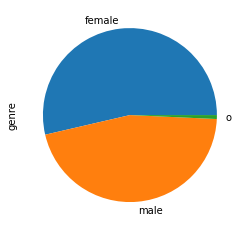

In [29]:
valores_genero = panda_datos["genre"].value_counts()
valores_genero = valores_genero.plot.pie()

### Distribución por Enfermedad

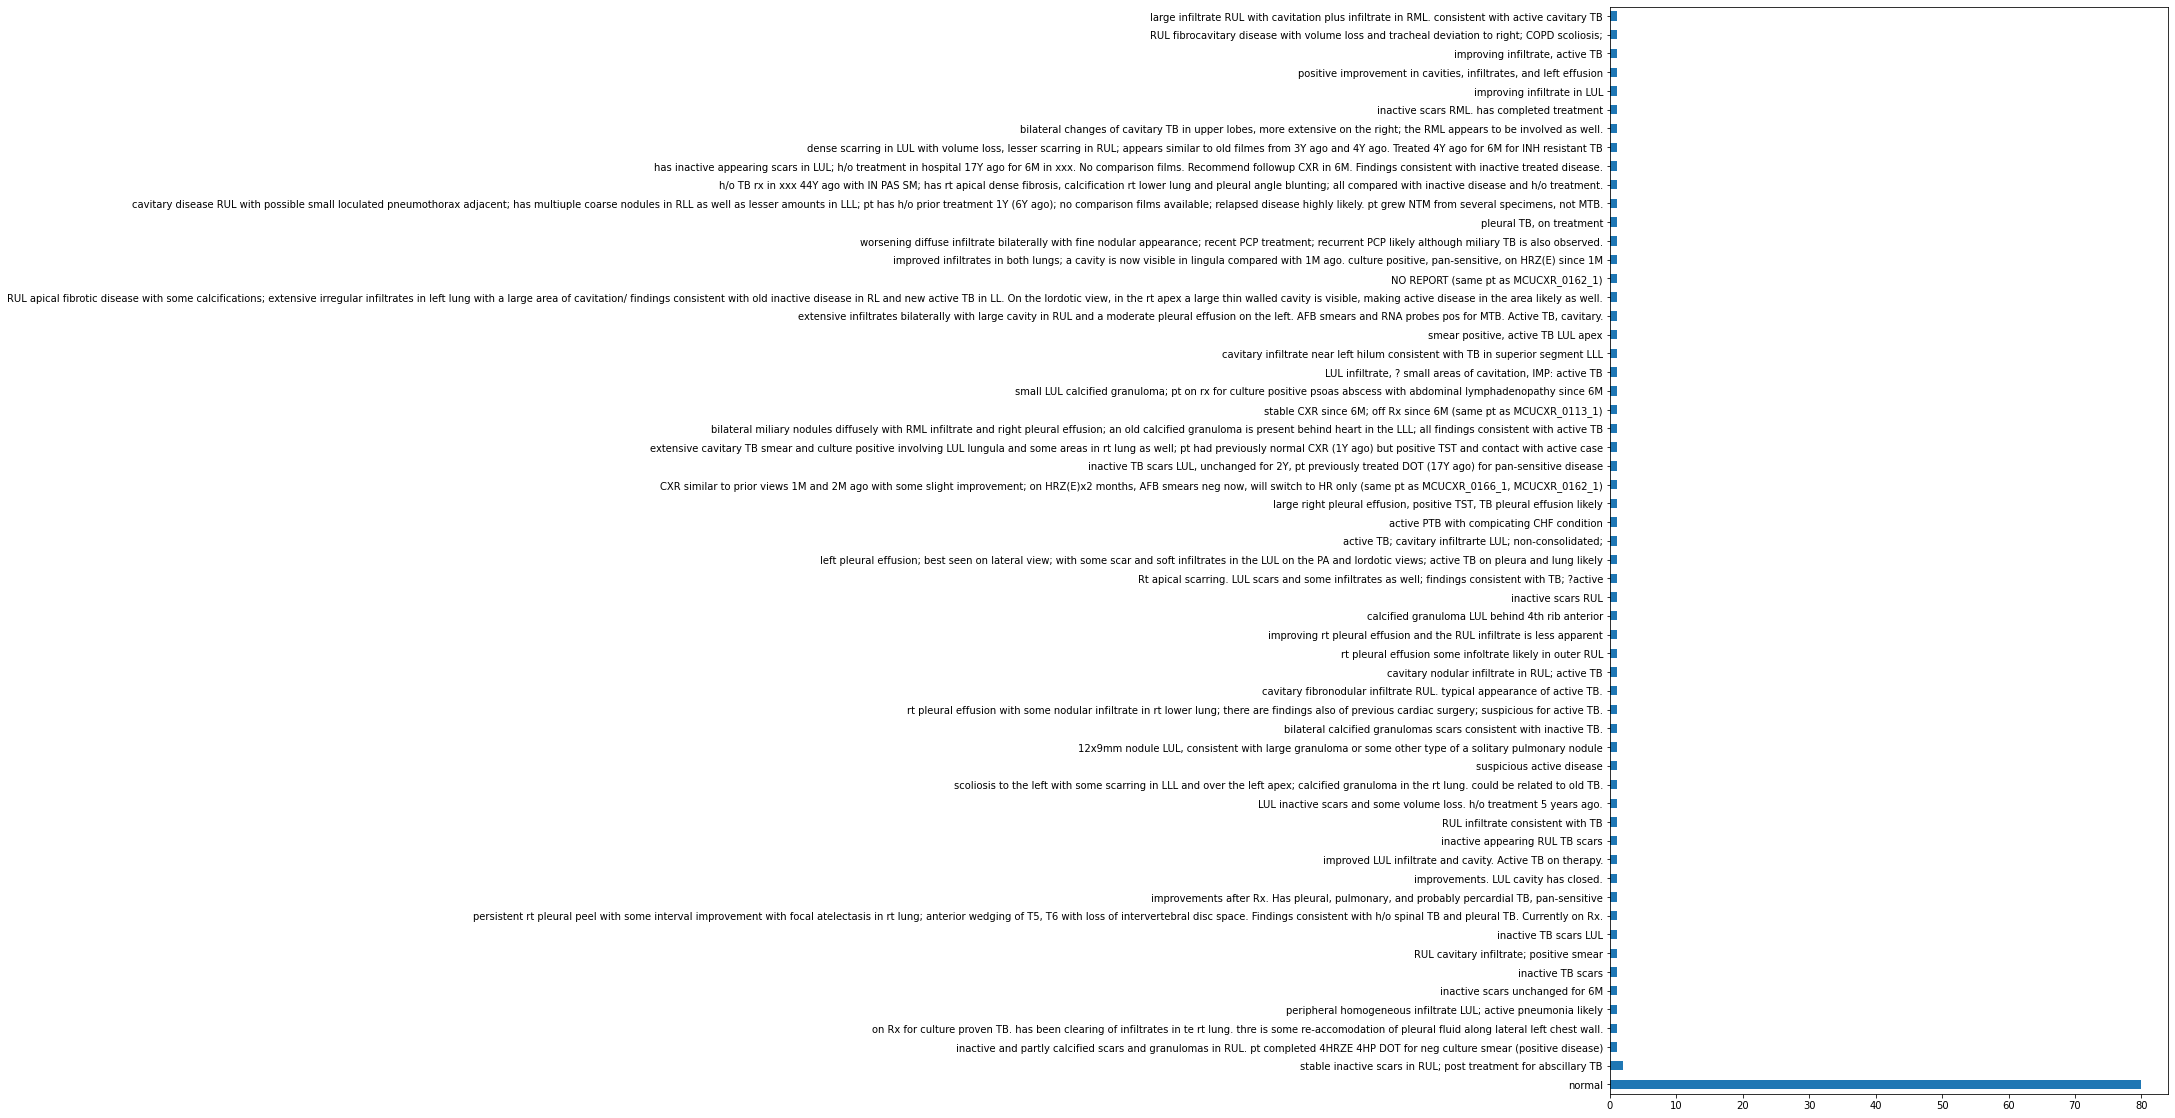

In [30]:
series_condition = panda_datos["condition"].value_counts()
matplot_condicion = series_condition.plot.barh(figsize=(10,20))

## Distribución por Edad

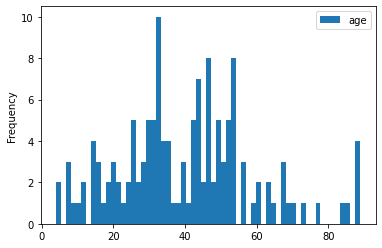

In [31]:
ax = panda_datos.plot.hist("age", panda_datos["age"].value_counts().count())

## Visualización de todos los datos

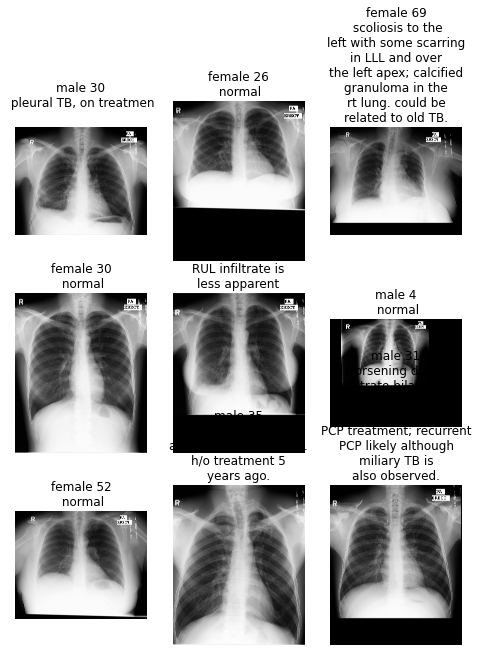

In [32]:
plt = graficar_dataset(panda_datos)
plt.show()

### Filtrar por Edad
### Jóvenes


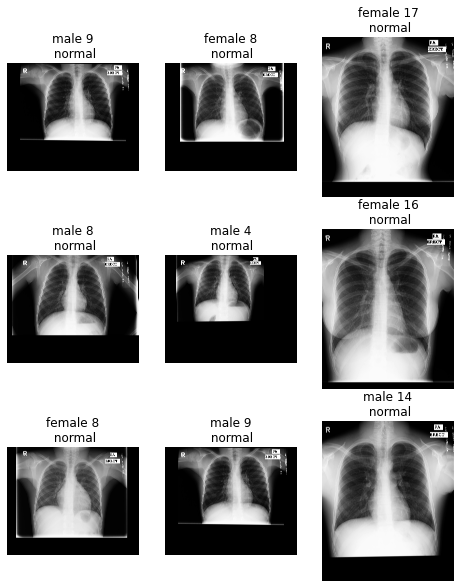

In [33]:
dataset_jovenes = panda_datos[panda_datos["age"] < 18.0]
plt = graficar_dataset(dataset_jovenes)
plt.show()


### Adultos 

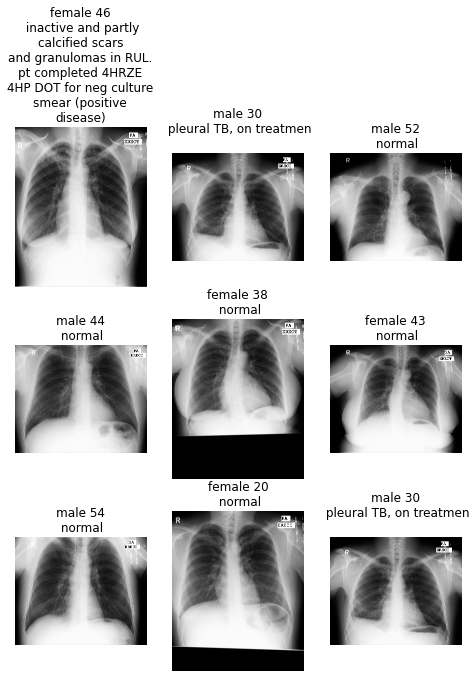

In [34]:
dataset_adultos = panda_datos[(panda_datos["age"] >= 18.0) & (panda_datos["age"] < 60.0)]
plt = graficar_dataset(dataset_adultos)
plt.show()

### Adultos Mayores

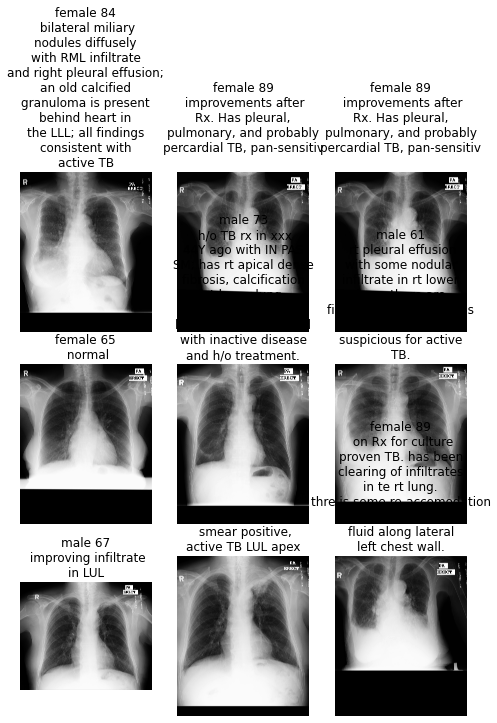

In [35]:
dataset_adultos_mayores = panda_datos[(panda_datos["age"] >= 60.0)]
plt = graficar_dataset(dataset_adultos_mayores)
plt.show()

### Filtrar por Condición
### Normal

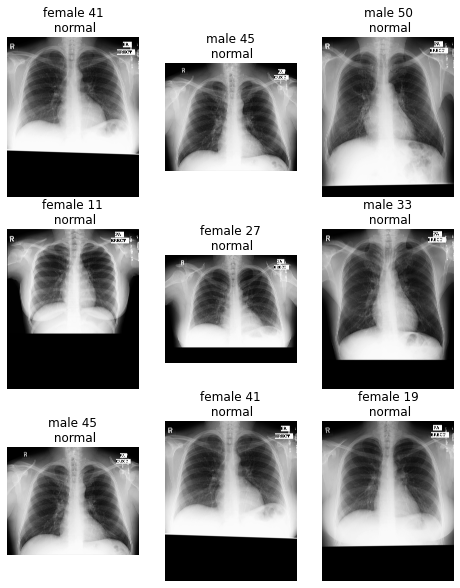

In [36]:
dataset_normal = panda_datos[panda_datos.condition == "normal"]
plt = graficar_dataset(dataset_normal)
plt.show()

### Con enfermedad

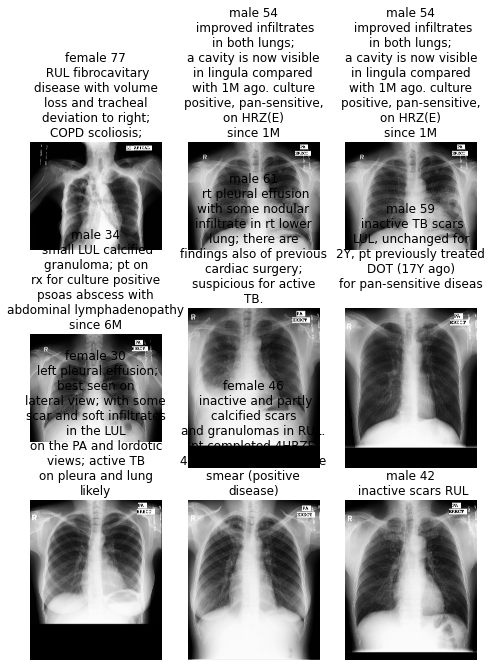

In [37]:
dataset_enfermedad = panda_datos[panda_datos.condition != "normal"]
plt = graficar_dataset(dataset_enfermedad)
plt.show()

In [41]:
series_condition = panda_datos["condition"].value_counts()

In [42]:
series_condition

normal                                                                                                                                                                                                                                                                                                                                            80
stable inactive scars in RUL; post treatment for abscillary TB                                                                                                                                                                                                                                                                                     2
inactive and partly calcified scars and granulomas in RUL. pt completed 4HRZE 4HP DOT for neg culture smear (positive disease)                                                                                                                                                                                                